# E-Commerce Data Analysis

### Aim of Project Analysis
The primary goal of this project is to predict the next product a customer is likely to purchase.

### Business Understanding

Online eCommerce refers to the buying and selling of goods or services over the internet. It enables consumers to browse, select, and purchase products from the comfort of their homes or anywhere with internet access. Retailers leverage eCommerce platforms to showcase their products, facilitate transactions, and manage inventory efficiently. Customers benefit from a wide variety of choices, competitive prices, and convenient payment and delivery options. eCommerce has revolutionized retail by providing a seamless and accessible shopping experience, fostering global trade, and empowering businesses of all sizes to reach a broader audience.


#### Fields:
Order_Number
State_Code
Customer_Name
Order_Date
Status
Product
Category
Brand
Cost
Sales
Quantity
Total_Cost
Total_Sales
Assigned Supervisor

### Data Understanding

In [89]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv file
data = pd.read_csv("Online-eCommerce.csv")
data

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,TN,Rahul Kumar Prajapati,31/12/2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31/12/2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31/12/2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31/12/2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh


In [3]:
#Checking first 10 rows of the data 
data.head(10)

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
5,139379.0,CG,Akhilesh Kumar,11/01/2020,Order,Compact with 1 Fan,Cabinet,Asus,1150.0,1495.0,2.0,2300.0,2990.0,Advika Joshi
6,139380.0,CG,Suvankar Chakraborty,11/01/2020,Order,USB Backlight Keyboard,Keyboard,Dell,850.0,1105.0,3.0,2550.0,3315.0,Ajay Sharma
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,139381.0,CG,Suvankar Adhikary,12/01/2020,Order,Ergonomic Mouse,Mouse,Samsung,650.0,845.0,2.0,1300.0,1690.0,Ajay Sharma


In [4]:
#Checking bottom 10 rows of the data
data.tail(10)

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
5100,144459.0,NL,Ranjeet Kumar,31/12/2022,Processing,I7 - intel 12th Generation,CPU,Intel,14500.0,18850.0,2.0,29000.0,37700.0,Roshan Kumar
5101,144460.0,OR,Sajal Singhal,31/12/2022,Delivered,USB Keyboard,Keyboard,Dell,800.0,1040.0,1.0,800.0,1040.0,Aarvi Gupta
5102,144461.0,PB,Akhilesh Kumar,31/12/2022,Shipped,Wireless Mouse,Mouse,Samsung,600.0,780.0,2.0,1200.0,1560.0,Vijay Singh
5103,144462.0,RJ,Suvankar Chakraborty,31/12/2022,Order,"21"" LCD Display",Monitor,Dell,10500.0,13650.0,4.0,42000.0,54600.0,Aadil Khan
5104,144463.0,SK,Suvankar Adhikary,31/12/2022,Processing,151 TB HDD,HDD,Western Digital,6500.0,8450.0,1.0,6500.0,8450.0,Advika Joshi
5105,144464.0,TN,Rahul Kumar Prajapati,31/12/2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31/12/2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31/12/2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31/12/2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh
5109,144468.0,WB,Javed Akhter,31/12/2022,Delivered,BTX motherboard,Motherboard,Gigabyte,4500.0,5850.0,3.0,13500.0,17550.0,Aadil Khan


In [5]:
#Quick inspection of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


In [6]:
#Summary of the data
data.describe()

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


In [7]:
#Summary of the data
data.describe(include="object")

,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Assigned Supervisor
count,5095,5095,5095,5095,5095,5095,5095,5095
unique,35,56,1086,4,1228,14,11,6
top,MH,Adhir Samal,03/04/2020,Processing,2GB Graphic Card,Monitor,Samsung,Aarvi Gupta
freq,904,122,181,1278,300,749,1199,967


In [8]:
### Checking the shape of a data frame
data.shape

(5110, 14)

In [9]:
for col in data.columns:
    print(col)

Order_Number
State_Code
Customer_Name
Order_Date
Status
Product
Category
Brand
Cost
Sales
Quantity
Total_Cost
Total_Sales
Assigned Supervisor


In [10]:
#Extracting the Order Number column
data["Order_Number"]

0       139374.0
1       139375.0
2       139376.0
3       139377.0
4       139378.0
          ...   
5105    144464.0
5106    144465.0
5107    144466.0
5108    144467.0
5109    144468.0
Name: Order_Number, Length: 5110, dtype: float64

In [11]:
#Removing all blank rows
data = data.dropna(how='all')
data

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,TN,Rahul Kumar Prajapati,31/12/2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31/12/2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31/12/2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31/12/2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh


In [12]:
data['State_Code'].nunique()

35

In [13]:
#Converting Data Types in Columns
data["State_Code"]= data["State_Code"].astype("category")
data["Status"]= data["Status"].astype("category")
data["Category"]= data["Category"].astype("category")
data["Brand"]= data["Brand"].astype("category")
data["Assigned Supervisor"]= data["Assigned Supervisor"].astype("category")
data["Order_Number"]= data["Order_Number"].astype("object")

In [14]:
data.dtypes

Order_Number             object
State_Code             category
Customer_Name            object
Order_Date               object
Status                 category
Product                  object
Category               category
Brand                  category
Cost                    float64
Sales                   float64
Quantity                float64
Total_Cost              float64
Total_Sales             float64
Assigned Supervisor    category
dtype: object

In [15]:
data.head(10)

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
5,139379.0,CG,Akhilesh Kumar,11/01/2020,Order,Compact with 1 Fan,Cabinet,Asus,1150.0,1495.0,2.0,2300.0,2990.0,Advika Joshi
6,139380.0,CG,Suvankar Chakraborty,11/01/2020,Order,USB Backlight Keyboard,Keyboard,Dell,850.0,1105.0,3.0,2550.0,3315.0,Ajay Sharma
9,139381.0,CG,Suvankar Adhikary,12/01/2020,Order,Ergonomic Mouse,Mouse,Samsung,650.0,845.0,2.0,1300.0,1690.0,Ajay Sharma
10,139382.0,CG,Rahul Kumar Prajapati,13/01/2020,Order,"15"" LCD Dsipaly",Monitor,Dell,7500.0,9750.0,1.0,7500.0,9750.0,Roshan Kumar
11,139383.0,JK,Sagar Jeur,14/01/2020,Order,2 TB HDD,HDD,Seagate,10000.0,13000.0,3.0,30000.0,39000.0,Aarvi Gupta


In [16]:
# Checking the total number of Nulls
data['Quantity'].isnull().sum()

0

In [17]:
#Check for number of  duplicate entries
data.duplicated().sum()

0

# Visualizing our dataset 

In [18]:
# Importing matplot library
import matplotlib.pyplot as plt 

In [19]:
data.columns

Index(['Order_Number', 'State_Code', 'Customer_Name', 'Order_Date', 'Status',
       'Product', 'Category', 'Brand', 'Cost', 'Sales', 'Quantity',
       'Total_Cost', 'Total_Sales', 'Assigned Supervisor'],
      dtype='object')

In [20]:
total_sales_brand = data.groupby("Brand")["Total_Sales"].sum().round(2).to_frame()
total_sales_brand

,Total_Sales
Brand,
Acer,6558630.0
Asus,2947594.0
Dell,14235195.0
Gigabyte,5886855.0
Hynix,5538520.0
Intel,18760300.0
MSI,3205254.0
Nvidia,13113100.0
Samsung,16166345.0


In [21]:
avg_total_cost_brand = data.groupby("Brand")["Total_Cost"].mean().round(2).to_frame()
avg_total_cost_brand

,Total_Cost
Brand,
Acer,33634.00
Asus,5049.84
Dell,12193.93
Gigabyte,15094.50
Hynix,9467.56
Intel,24051.67
MSI,16437.20
Nvidia,22415.56
Samsung,10371.68


In [22]:
quantity_brand = data.groupby("Brand")["Quantity"].count().round(2).to_frame()
quantity_brand

,Quantity
Brand,
Acer,150
Asus,449
Dell,898
Gigabyte,300
Hynix,450
Intel,600
MSI,150
Nvidia,450
Samsung,1199


In [23]:
total_sales_brand.index

CategoricalIndex(['Acer', 'Asus', 'Dell', 'Gigabyte', 'Hynix', 'Intel', 'MSI',
                  'Nvidia', 'Samsung', 'Seagate', 'Western Digital'],
                 categories=['Acer', 'Asus', 'Dell', 'Gigabyte', ..., 'Nvidia', 'Samsung', 'Seagate', 'Western Digital'], ordered=False, dtype='category', name='Brand')

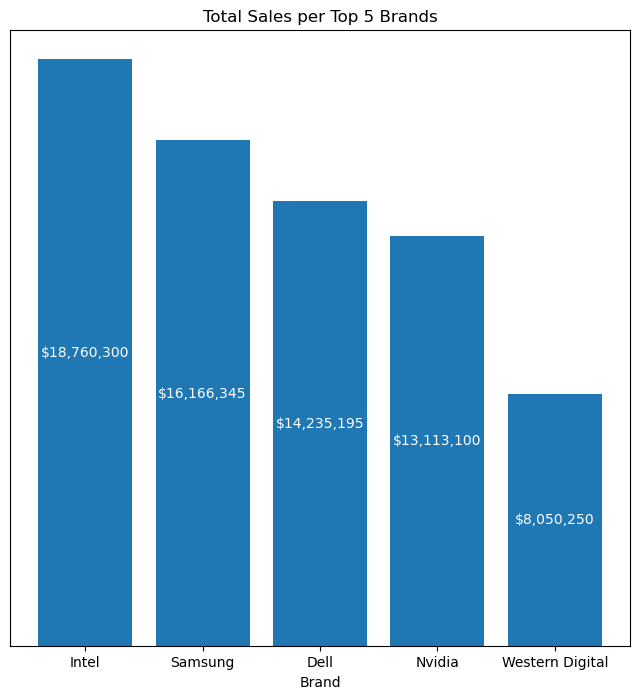

In [24]:
#visualizing Brand and Total Sales
top_5_sales_brand = total_sales_brand.sort_values(by="Total_Sales", ascending=False).head(5)

# Print the top 5 by total sales
plt.figure(figsize=(8, 8))
bars = plt.bar(top_5_sales_brand.index, top_5_sales_brand["Total_Sales"])
plt.title("Total Sales per Top 5 Brands")
plt.xlabel("Brand")
plt.ylabel("Total Sales")

# Add data labels in the center of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'${yval:,.0f}', va='center', ha='center', color='white')  # va: vertical alignment, ha: horizontal alignment

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('total sales per top 5 brands.jpeg')
plt.show()

From the chart, Intel made the highest sale of 18,760,300 dollars and Western Digital made the least with 8,050,250 dollars

                 Total_Cost
Brand                      
Acer               33634.00
Seagate            24800.00
Intel              24051.67
Nvidia             22415.56
Western Digital    20710.70


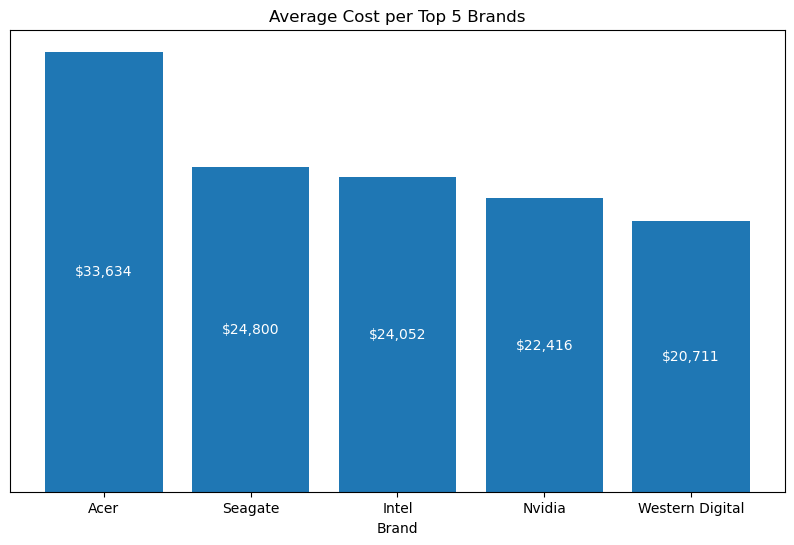

In [25]:
top_5_cost_brand = avg_total_cost_brand.sort_values(by="Total_Cost", ascending=False).head(5)

# Print the top 5 by total sales
print(top_5_cost_brand)

# Plot the top 5 brands by total sales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cost_brand.index, top_5_cost_brand["Total_Cost"])
plt.title("Average Cost per Top 5 Brands")
plt.xlabel("Brand")
plt.ylabel("Average Cost")

# Add data labels in the center of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'${yval:,.0f}', va='center', ha='center', color='white')  # va: vertical alignment, ha: horizontal alignment

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('average cost per top 5 brands.jpeg')
plt.show()

Acer leads in average cost across the brands with 33,634 dollars and Western Digital is the least among the top 5 brands with an average cost of 20,711 dollars.

In [26]:
data.describe()

,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,350.000000,455.000000,1.000000,350.000000,455.000000
25%,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


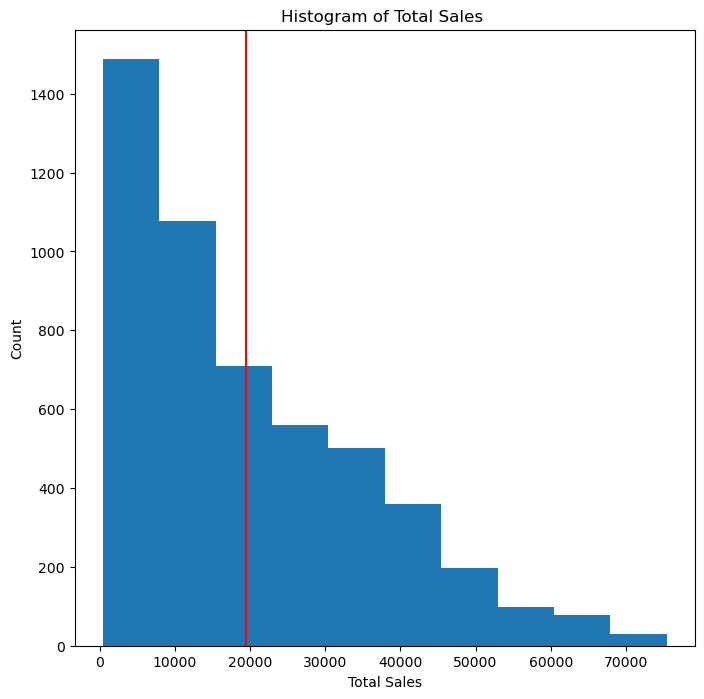

In [27]:
plt.figure(figsize=(8,8))
plt.hist(x=data["Total_Sales"],bins=10)
plt.title("Histogram of Total Sales ")
plt.xlabel("Total Sales")
plt.ylabel("Count")
plt.axvline(19489,color = 'r')
plt.savefig('histogram of total sales.jpeg')
plt.show()

The distribution of Total Sales  with a mean value of 19489 dollars is heavily right-skewed, indicating that most orders have relatively low total sales amounts, with fewer orders having very high sales amounts. The highest frequency of total sales falls within the lower sales ranges. Specifically, a significant number of orders have total sales amounts less than approximately $10,000.

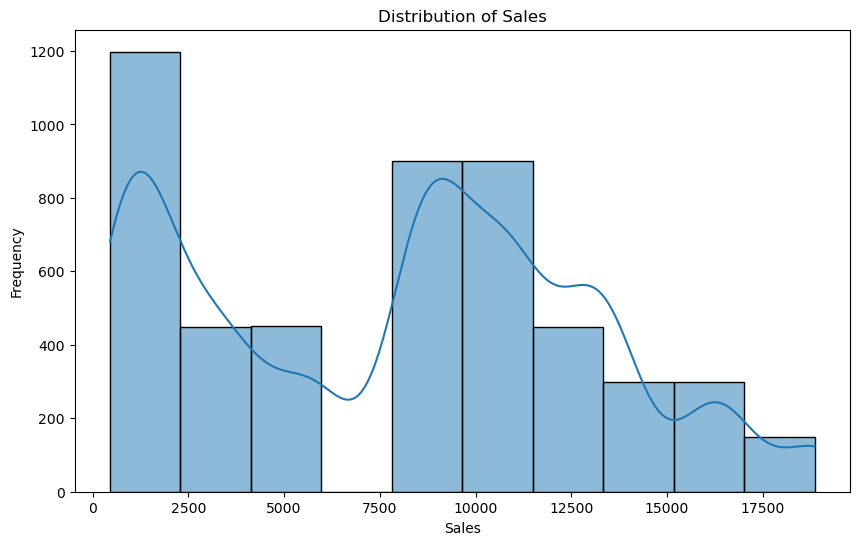

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=10, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.savefig('distribition.jpeg')
plt.show()

The chart indicates a high frequency of low sales amounts, specifically in the 0-2500 range. The distribution is bimodal, with two peaks: one around 1000-1500 and another around 9000-10000. As sales amounts increase, the overall frequency tends to decrease, except for the mid-range peak. The sales range around 5000-7500 has the lowest frequency. 

In [29]:
count_product_supervisor = data.groupby("Assigned Supervisor")["Product"].count().to_frame()
count_product_supervisor

,Product
Assigned Supervisor,
Aadil Khan,797
Aarvi Gupta,967
Advika Joshi,791
Ajay Sharma,948
Roshan Kumar,798
Vijay Singh,794


                     Product
Assigned Supervisor         
Aarvi Gupta              967
Ajay Sharma              948
Roshan Kumar             798
Aadil Khan               797
Vijay Singh              794


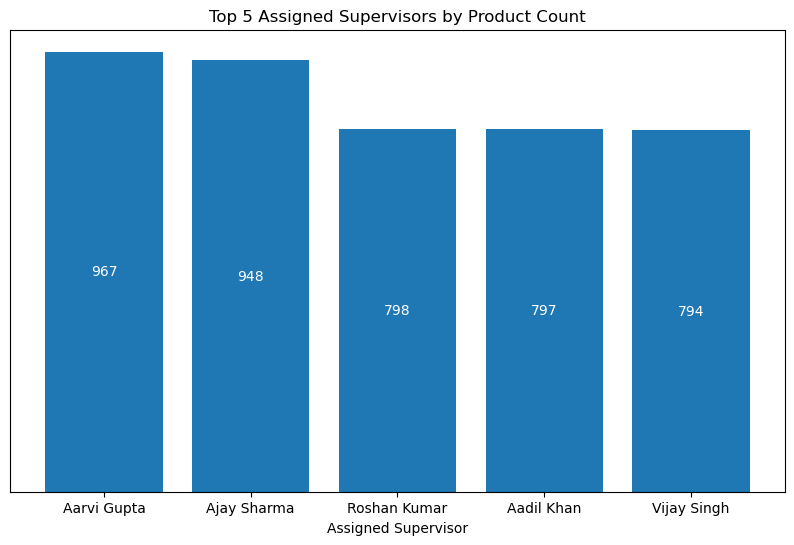

In [30]:
#visualizing Brand and Total Sales
top_5_assigned_supervisor =count_product_supervisor.sort_values(by="Product", ascending=False).head(5)

# Print the top 5 by total sales
print(top_5_assigned_supervisor)

# Plot the top 5 brands by total sales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_assigned_supervisor.index, top_5_assigned_supervisor["Product"])
plt.title("Top 5 Assigned Supervisors by Product Count")
plt.xlabel("Assigned Supervisor")
plt.ylabel("Product Count")

# Add data labels in the center of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:,.0f}', va='center', ha='center', color='white')  # va: vertical alignment, ha: horizontal alignment

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('top 5 assigned supervisors.jpeg')
plt.show()


Aarvi Gupta emerges as the assigned supervisor with highest product count of 967 and Vijay Singh has the least product count of 794 among the top 5 assigned supervisors

In [31]:
top_5_Product_Count = count_product_supervisor.sort_values(by="Product", ascending=False).head(5)

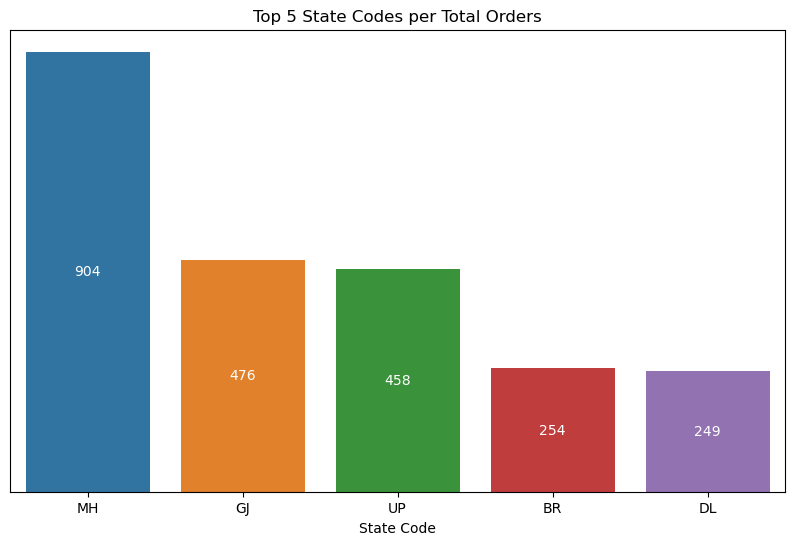

In [32]:
# Distribution of Orders by State
# Get the top 5 states by order count
top_5_states = data['State_Code'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.countplot(x='State_Code', data=data, order=top_5_states.index)
plt.title('Top 5 State Codes per Total Orders')
plt.xlabel('State Code')

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)

# Add data labels at the center of each bar
for idx, value in enumerate(top_5_states):
    plt.text(idx, value/2, f'{value:,.0f}', ha='center', va='center', color='white')
    
plt.savefig('top 5 state codes.jpeg')
plt.show()

MH leads in total orders with a count of 904 and DL has the least total orders of 249 amongst the top 5 state codes

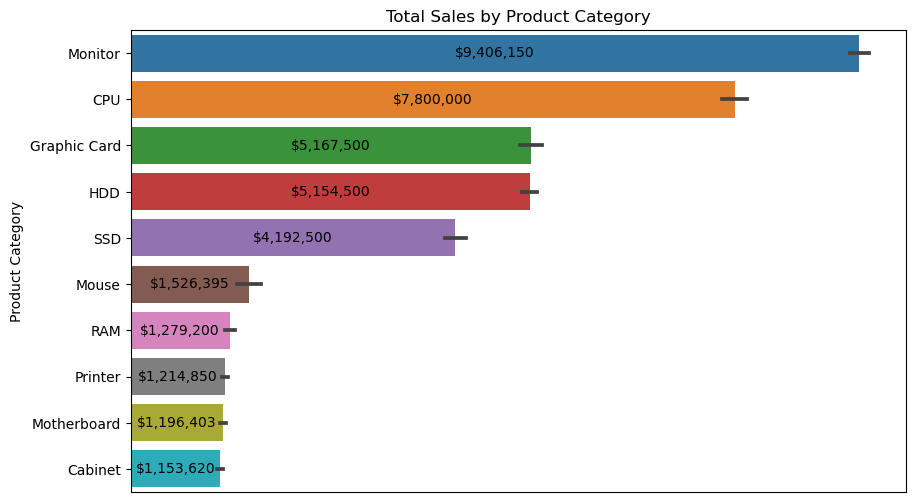

In [33]:
# Sales by Product Category


# Get the top 10 categories by total sales
top_10_categories = data.groupby('Category')['Sales'].sum().nlargest(10)

# Plot total sales by product category as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=data, estimator=sum, order=top_10_categories.index)
plt.title('Total Sales by Product Category')
plt.ylabel('Product Category')

# Add data labels at the center of each bar with commas and dollar symbol
for idx, value in enumerate(top_10_categories):
    plt.text(value/2, idx, f'${value:,.0f}', ha='center', va='center', color='black')

# Remove the x-axis
plt.gca().axes.xaxis.set_visible(False)

plt.savefig('total sales by product category.jpeg')
plt.show()

The product category "Monitor" has a total sale of 9,406,150 dollars and "Cabinet" has the least total sales of 1,153,620

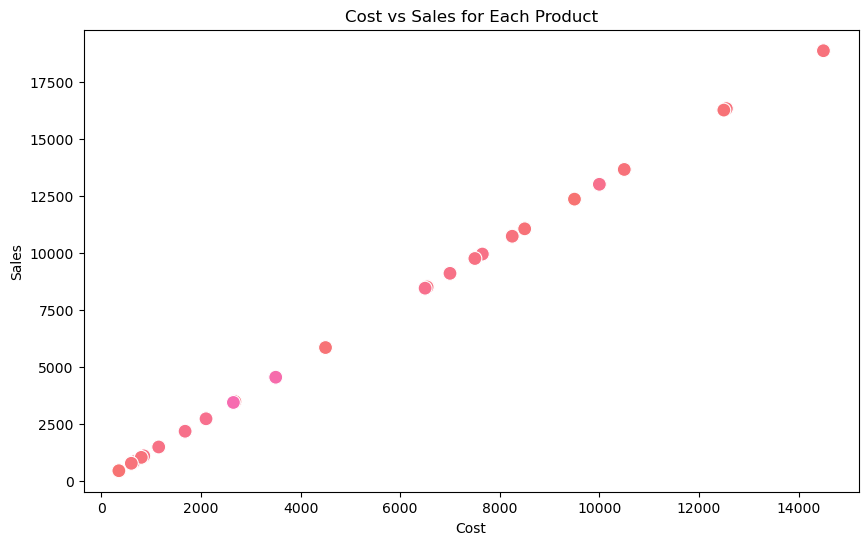

In [34]:
# Cost vs Sales for each Product
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Sales', hue='Product', data=data, s=100)
plt.title('Cost vs Sales for Each Product')
plt.xlabel('Cost')
plt.ylabel('Sales')
plt.legend([],[], frameon=False)  # This effectively removes the legend\
plt.savefig('cost vs sales.jpeg')
plt.show()

The data points appear to form a straight line, suggesting a linear relationship, a clear positive correlation  between cost and sales. This indicates that for every unit increase in cost, there is a consistent increase in sales.

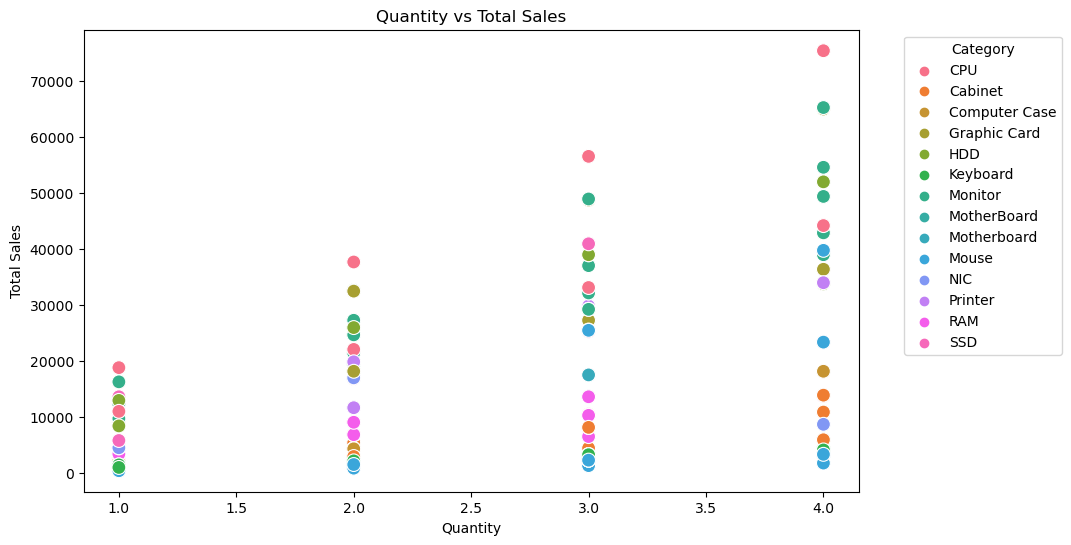

In [35]:
# Quantity vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total_Sales', hue='Category', data=data, s=100)
plt.title('Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('quantity vs total sales.jpeg')
plt.show()

There is a positive correlation between quantity and total sales ie.  Higher quantities (3 and 4) tend to have higher total sales, suggesting that selling more units leads to greater sales revenue.

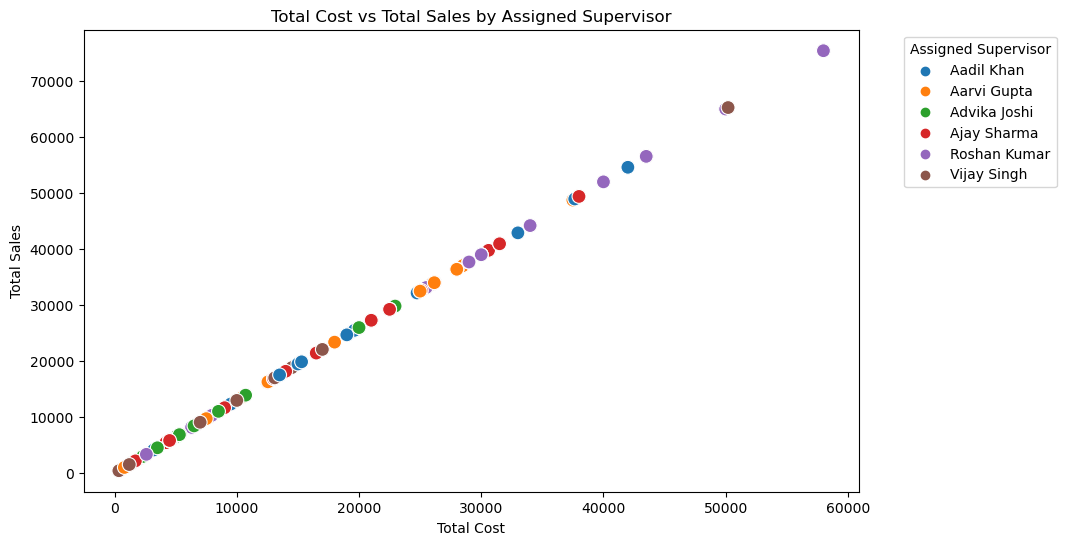

In [36]:
# Total Cost vs Total Sales by Assigned Supervisor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Cost', y='Total_Sales', hue='Assigned Supervisor', data=data, s=100)
plt.title('Total Cost vs Total Sales by Assigned Supervisor')
plt.xlabel('Total Cost')
plt.ylabel('Total Sales')
plt.legend(title='Assigned Supervisor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('total cost vs total sales.jpeg')
plt.show()

There is a positive correlation between total cost and total sales ie. the higher the total sales, the higher the cost.

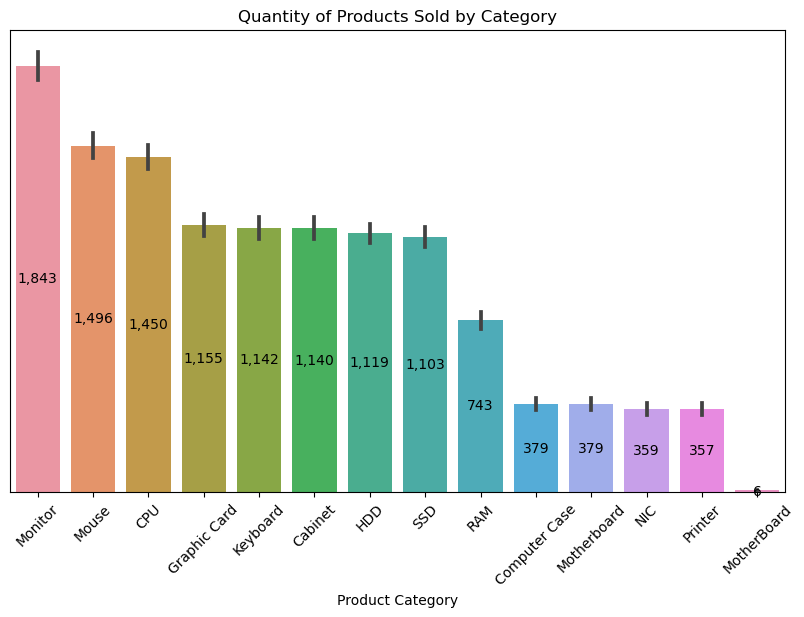

In [37]:
# Sort categories by the sum of Quantity sold
sorted_categories = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False).index

# Plot Quantity of Products Sold by Category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Quantity', data=data, estimator=sum, order=sorted_categories)
plt.title('Quantity of Products Sold by Category')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')

# Add data labels at the inner center of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(format(height, ',.0f'), 
                (x + width / 2, y + height / 2), 
                ha='center', va='center',
                xytext=(0, 0),  # Center vertically within the bar
                textcoords='offset points')

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)

plt.savefig('quantity of products sold.jpeg')
plt.show()



The category "Monitor" tops in quantity of products sold with 1843 counts and "MotherBoard" has the least quantity of products sold with 357 counts.

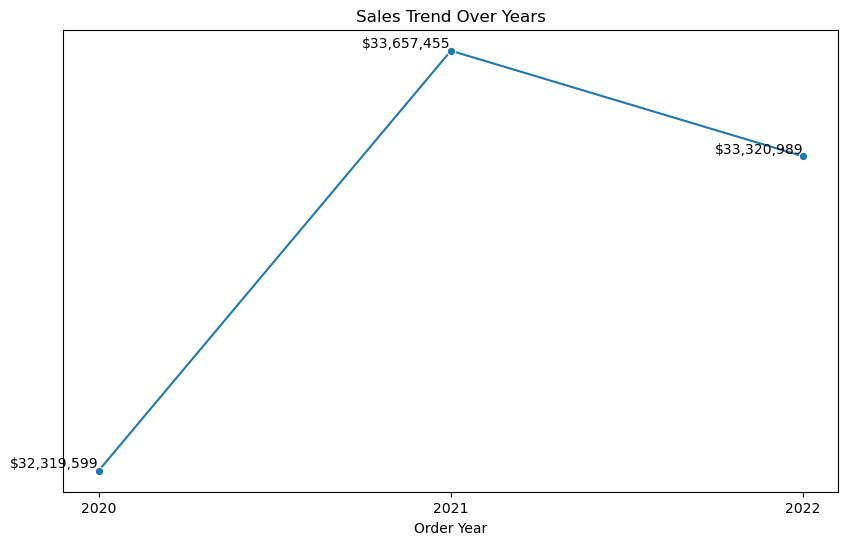

In [38]:
# Convert Order_Date to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d/%m/%Y')

# Extract distinct years from Order_Date
data['Order_Year'] = data['Order_Date'].dt.year

# Group by year and sum sales
sales_trend = data.groupby('Order_Year')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Year', y='Total_Sales', data=sales_trend, marker='o')
plt.title('Sales Trend Over Years')
plt.xlabel('Order Year')
plt.ylabel('Total Sales')

# Add data labels with dollar symbol and remove y-axis
for index, row in sales_trend.iterrows():
    plt.text(row['Order_Year'], row['Total_Sales'], f'${row["Total_Sales"]:,.0f}', ha='right', va='bottom')

plt.gca().axes.yaxis.set_visible(False)
plt.xticks(sales_trend['Order_Year'].unique())
plt.savefig('Sales trend over years.jpeg')
plt.show()


In 2021, sales reached peaked at $33,657,455 dollars, but subsequently declined in 2022.

### Data Modelling

#### Separating the data into predictor variables and target variable

In [60]:
# 1. Separating the data into predictor variables (X) and target variable (y)
X = data.drop(['Total_Sales', 'Order_Number', 'Customer_Name', 'Order_Year', 'Order_Date', 'State_Code'], axis =1)

y = data['Total_Sales']

#### Encoding categorical variables

In [61]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Status', 'Product', 'Category', 'Brand', 'Assigned Supervisor']

for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [62]:
X['Status'].nunique()

4

#### Checking predictor variables

In [63]:
X

,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Assigned Supervisor
0,0,656,13,8,6500.0,8450.0,1.0,6500.0,3
1,0,1072,0,5,8500.0,11050.0,3.0,25500.0,4
2,0,427,3,7,7000.0,9100.0,2.0,14000.0,1
3,0,303,12,4,6550.0,8515.0,3.0,19650.0,5
4,1,1222,7,3,7650.0,9945.0,4.0,30600.0,0
...,...,...,...,...,...,...,...,...,...
5105,0,595,13,8,4500.0,5850.0,1.0,4500.0,3
5106,3,1069,0,5,8500.0,11050.0,4.0,34000.0,4
5107,1,641,3,7,12500.0,16250.0,2.0,25000.0,1
5108,2,300,12,4,3500.0,4550.0,2.0,7000.0,5


#### Checking target variable

In [64]:
y

0        8450.0
1       33150.0
2       18200.0
3       25545.0
4       39780.0
         ...   
5105     5850.0
5106    44200.0
5107    32500.0
5108     9100.0
5109    17550.0
Name: Total_Sales, Length: 5095, dtype: float64

### Splitting data into train dataset

In [90]:
#  Splitting data into train dataset and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.50,random_state = 42)

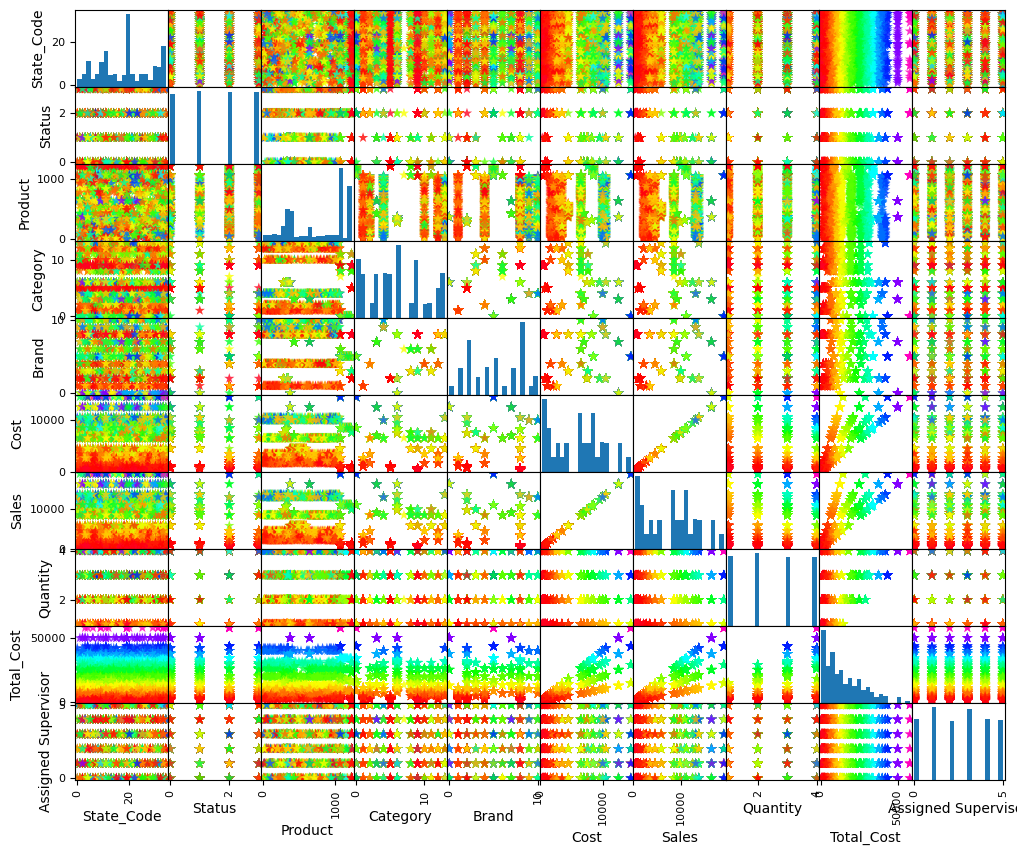

In [46]:
from matplotlib import cm #import matplotlib color map
pd.plotting.scatter_matrix(X_train,c=y_train, figsize=(12, 10), marker='*',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = cm.get_cmap('gist_rainbow'))
plt.show()

### Building a Decision Tree Model

In [95]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9956828885400314
